<a href="https://colab.research.google.com/github/WhyJYJ/deep-learning-for-everyone/blob/master/ch16/MNIST_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16장 이미지 인식의 꽃, CNN 익히기
16-1 MNIST 손글씨 인식하기 : 데이터 전처리

In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


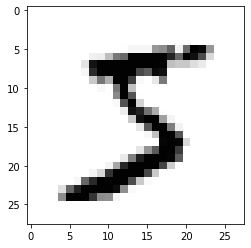

In [4]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

**컴퓨터는 어떻게 이미지를 인식?**</br>
이미지는 28 x 28 = 784개의 픽셀로 이루어짐. 
각 픽셀은 밝기 정도에 따라 0 ~ 255까지 등급이 매겨짐(흰색 0, 검은색 1 ~ 255).</br>
=> 28 x 28 = 784개의 속성을 이용해 0 ~ 9까지 10개 클래스 중 하나를 맞히는 문제로 전환

In [5]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


reshape 함수로 28 x 28의 2차원 배열을 길이 784의 1차원 배열로 바꿔 주어야 함

In [0]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)  # reshape(총 샘플 수, 1차원 속성의 수)

**데이터 정규화(Normalization)**</br>
데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정</br>
=> keras는 데이터를 0 ~ 1사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보이므로 0 ~ 255 사이의 값을 모두 255로 나워서 0 ~ 1 사이의 값으로 바꿈


In [0]:
# 데이터 정규화
X_train = X_train.astype('float64') # astype 이용해서 실수형으로 변환
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [8]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


**원-핫 인코딩**</br>
0~9까지의 정수형 값을 갖는 현재 형태에서 0 또는 1로만 이루어진 벡터로 값을 수정해야 함(12장 IRIS 품종 예측에서 처럼)</br>
=> np_utils.to_categorical 함수 이용

In [0]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10) # to_categorial(클래스, 클래스 개수)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [10]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
